## Multiclass Linear Regression 

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

Load Data set

In [24]:
data = pd.read_csv('data/hiring.csv')

Show The First 5 rows 

In [25]:
data.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


Data Cleaning and preprocessing 

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [27]:
data.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [28]:
data['experience'] = data['experience'].fillna('zero')

In [29]:
data.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [30]:
data.isna().sum()

experience                    0
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [31]:
data['test_score(out of 10)']

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     NaN
7     7.0
Name: test_score(out of 10), dtype: float64

In [32]:
import math
data_m = math.floor(data['test_score(out of 10)'].mean())
data_m

7

In [33]:
data['test_score(out of 10)'] = data['test_score(out of 10)'].fillna(data_m)
data.tail()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [34]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [35]:
labe = LabelEncoder()
labe

LabelEncoder()

In [36]:
data['experience_encode'] = labe.fit_transform(data['experience'])

In [37]:
data.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($),experience_encode
0,zero,8.0,9,50000,6
1,zero,8.0,6,45000,6
2,five,6.0,7,60000,1
3,two,10.0,10,65000,5
4,seven,9.0,6,70000,2


In [38]:
data = data.drop(['experience'], axis=1)
data

,test_score(out of 10),interview_score(out of 10),salary($),experience_encode
0,8.0,9,50000,6
1,8.0,6,45000,6
2,6.0,7,60000,1
3,10.0,10,65000,5
4,9.0,6,70000,2
5,7.0,10,62000,4
6,7.0,7,72000,3
7,7.0,8,80000,0


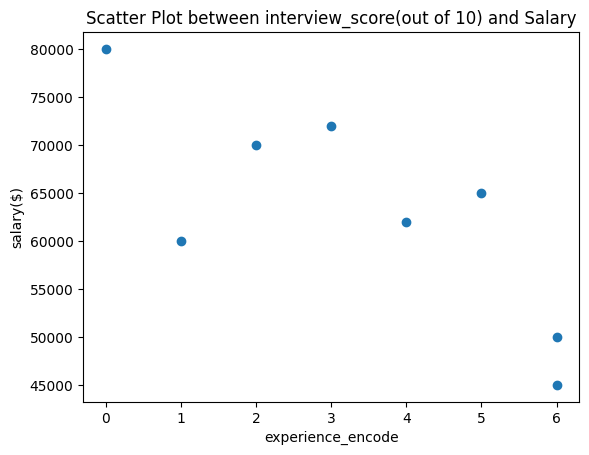

In [42]:
plt.Figure(figsize=(10,8))
plt.scatter(data[['experience_encode']],data['salary($)'])
plt.title('Scatter Plot between interview_score(out of 10) and Salary')
plt.xlabel('experience_encode')
plt.ylabel("salary($)")
plt.show()

In [43]:
model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
model.fit(data[['experience_encode','test_score(out of 10)','interview_score(out of 10)']],data['salary($)'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
model.coef_

array([-5231.53965219,  3302.69507421,  1827.82482018])

In [46]:
model.intercept_

np.float64(40666.439042156075)

In [47]:
model.predict([[5231.53965219,3302.69507421,3302.69507421]])

d:\Machine-Learning-Projects\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-10383797.91008022])

In [49]:
model.predict([[6,8,6]])

d:\Machine-Learning-Projects\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([46665.71064372])